# Preparing testing and training data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv('daily_data.csv')
raw_data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006,0.0,54,75,28.0,10.0,6,11.9,2,6:04 AM,7:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006,0.0,73,75,24.5,10.0,1,23.4,1,6:05 AM,7:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011,4.5,100,75,20.0,10.0,1,12.6,1,6:05 AM,7:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018,0.0,88,0,17.0,10.0,1,11.2,1,6:06 AM,7:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019,0.0,94,0,18.0,10.0,1,9.0,1,6:07 AM,7:15 PM


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   int64  
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   int64  
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   int64  
 13  gust_kph                  2893 non-null   float64
 14  air_qual

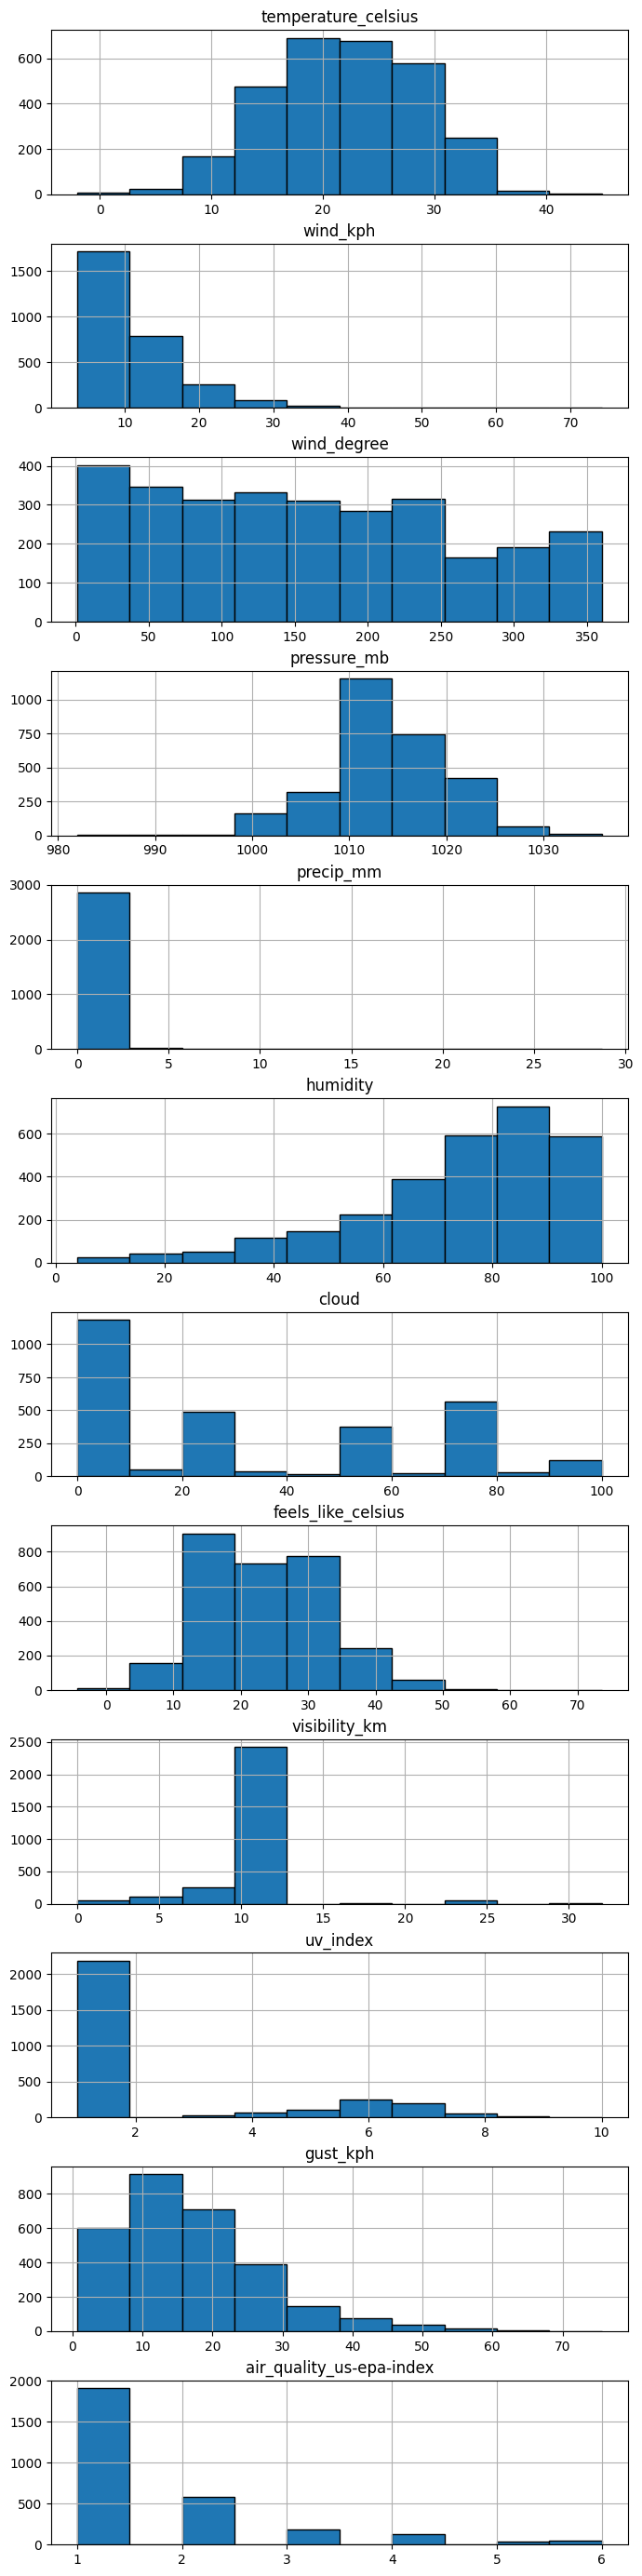

In [4]:
raw_data.hist(bins=10, figsize=(8, 50), layout=(len(raw_data.columns), 1), edgecolor='black')
plt.show()

temperature_celsius         Axes(0.125,0.841881;0.775x0.0381188)
wind_kph                    Axes(0.125,0.796139;0.775x0.0381188)
wind_degree                 Axes(0.125,0.750396;0.775x0.0381188)
pressure_mb                 Axes(0.125,0.704653;0.775x0.0381188)
precip_mm                   Axes(0.125,0.658911;0.775x0.0381188)
humidity                    Axes(0.125,0.613168;0.775x0.0381188)
cloud                       Axes(0.125,0.567426;0.775x0.0381188)
feels_like_celsius          Axes(0.125,0.521683;0.775x0.0381188)
visibility_km               Axes(0.125,0.475941;0.775x0.0381188)
uv_index                    Axes(0.125,0.430198;0.775x0.0381188)
gust_kph                    Axes(0.125,0.384455;0.775x0.0381188)
air_quality_us-epa-index    Axes(0.125,0.338713;0.775x0.0381188)
dtype: object

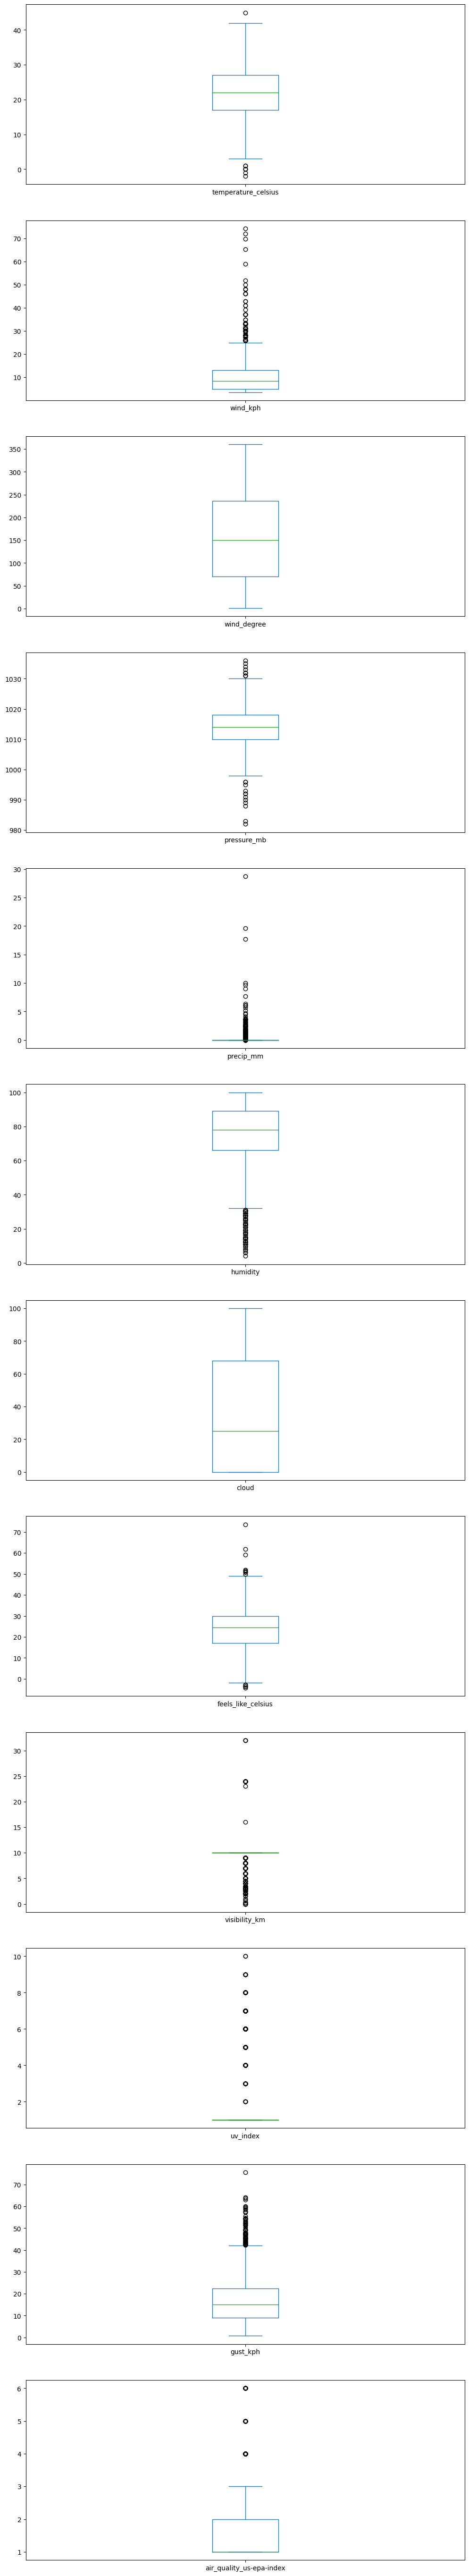

In [5]:
raw_data.plot(kind='box', subplots=True, layout=(len(raw_data.columns),1), figsize=(12, 100), sharex=False, sharey=False)

In [6]:
# encoding categorical data
raw_data['city_id'], _ = raw_data['city_id'].factorize()
data=raw_data.dropna()
label_encoder = preprocessing.LabelEncoder()
data['condition_text']= label_encoder.fit_transform(data['condition_text'])

<ipython-input-6-ab02ca0ea06d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['condition_text']= label_encoder.fit_transform(data['condition_text'])


In [7]:
for colname in []:
    data[colname], _ = data[colname].factorize()

matrix = data[[ 'city_id', 'temperature_celsius', 'condition_text',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_us-epa-index']].corr(method="kendall")

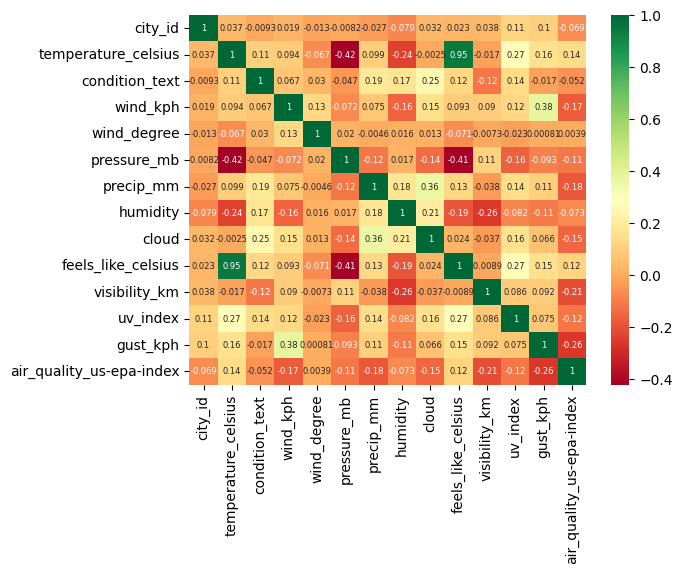

In [10]:
sns.heatmap(matrix, annot=True, cmap="RdYlGn", annot_kws={'fontsize': 6})
plt.show()

# approach 1 ( using SMOTE )

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df = pd.read_csv('train.csv')
train_df

,Unnamed: 0,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,condition_text,visibility_km
0,2,20.0,0,3.6,1011.0,4.50,1.0,100,75,3,10.0
1,3,17.0,0,6.1,1018.0,0.00,1.0,88,0,0,10.0
2,6,21.0,0,4.0,1015.0,0.00,1.0,100,50,6,10.0
3,18,19.0,0,3.6,1017.0,0.00,1.0,88,0,0,10.0
4,27,19.0,1,3.6,1010.0,0.00,1.0,73,25,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...
474,2838,27.0,109,19.1,1014.0,0.01,6.0,70,25,6,10.0
475,2863,21.4,110,3.6,1012.0,0.00,6.0,89,75,2,10.0
476,2873,16.9,111,16.6,1018.0,0.00,1.0,44,2,0,10.0
477,2886,19.5,111,5.4,1014.0,0.00,1.0,34,0,0,10.0


In [ ]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
train_df

,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,condition_text,visibility_km
0,20.0,0,3.6,1011.0,4.50,1.0,100,75,3,10.0
1,17.0,0,6.1,1018.0,0.00,1.0,88,0,0,10.0
2,21.0,0,4.0,1015.0,0.00,1.0,100,50,6,10.0
3,19.0,0,3.6,1017.0,0.00,1.0,88,0,0,10.0
4,19.0,1,3.6,1010.0,0.00,1.0,73,25,6,10.0
...,...,...,...,...,...,...,...,...,...,...
474,27.0,109,19.1,1014.0,0.01,6.0,70,25,6,10.0
475,21.4,110,3.6,1012.0,0.00,6.0,89,75,2,10.0
476,16.9,111,16.6,1018.0,0.00,1.0,44,2,0,10.0
477,19.5,111,5.4,1014.0,0.00,1.0,34,0,0,10.0


In [ ]:
train_df['condition_text'].value_counts()

condition_text
0    122
6    122
2     68
1     53
4     50
7     21
3     16
8     15
5     12
Name: count, dtype: int64

In [ ]:
# prompt: upsamle classes 5,8,3,7 with atleast 30 more data entries and use a good upsampling technique like smote and give the final full dataset

from sklearn.utils import resample

# Separate majority and minority classes
majority_df = train_df[~train_df['condition_text'].isin([5, 8, 3, 7])]
minority_df = train_df[train_df['condition_text'].isin([5, 8, 3, 7])]

# Upsample minority classes
for condition in [5, 8, 3, 7]:
    minority_class_df = minority_df[minority_df['condition_text'] == condition]
    upsampled_df = resample(minority_class_df, replace=True, n_samples=30, random_state=0)
    majority_df = pd.concat([majority_df, upsampled_df])

# Combine upsampled data with majority data
final_df = pd.concat([majority_df, minority_df])

# Print the final dataset
print(final_df)


condition_text
0    100
6     96
2     56
4     42
1     41
5     30
7     30
3     30
8     30
Name: count, dtype: int64


In [ ]:
X_train_upsampled

,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,visibility_km
0,24.700000,29,11.500000,1014.000000,0.000000,1.000000,89,68,10.000000
1,18.000000,33,9.000000,1013.000000,1.900000,1.000000,94,75,10.000000
2,21.000000,47,3.600000,1002.000000,0.900000,5.000000,88,50,4.000000
3,23.000000,92,4.000000,1012.000000,0.000000,6.000000,94,75,9.000000
4,26.000000,34,11.200000,1014.000000,0.000000,1.000000,84,50,10.000000
...,...,...,...,...,...,...,...,...,...
450,18.464504,13,4.217790,1018.674847,0.013935,1.185802,77,97,10.000000
451,21.354731,62,4.855856,1014.607545,0.000000,1.000000,96,55,8.177365
452,23.341048,56,6.800000,1016.488428,1.576004,1.000000,100,25,10.000000
453,24.869897,68,14.846299,1012.325258,0.000000,1.000000,84,26,8.674742


In [ ]:
upsampled_df.isnull().sum()

temperature_celsius    0
city_id                0
wind_kph               0
pressure_mb            0
precip_mm              0
uv_index               0
humidity               0
cloud                  0
condition_text         0
visibility_km          0
dtype: int64

In [ ]:
upsampled_df

,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,condition_text,visibility_km
0,20.0,0,3.6,1011.0,4.50,1.0,100,75,3,10.0
1,17.0,0,6.1,1018.0,0.00,1.0,88,0,0,10.0
2,21.0,0,4.0,1015.0,0.00,1.0,100,50,6,10.0
3,19.0,0,3.6,1017.0,0.00,1.0,88,0,0,10.0
4,19.0,1,3.6,1010.0,0.00,1.0,73,25,6,10.0
...,...,...,...,...,...,...,...,...,...,...
290,21.0,60,24.1,1012.0,0.15,1.0,78,75,7,10.0
290,21.0,60,24.1,1012.0,0.15,1.0,78,75,7,10.0
133,18.0,32,15.1,1010.0,0.00,1.0,94,75,7,9.0
290,21.0,60,24.1,1012.0,0.15,1.0,78,75,7,10.0


In [ ]:
train = upsampled_df.copy()

In [ ]:
y = train.pop('condition_text')
y

0      3
1      0
2      6
3      0
4      6
      ..
290    7
290    7
133    7
290    7
35     7
Name: condition_text, Length: 599, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  train,y , random_state=104,test_size=0.1, shuffle=True)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model  = XGBClassifier(random_state=0)
xgb_model .fit(X_train,y_train)
predcitions=xgb_model.predict(X_test)
print(predcitions)
score = accuracy_score(y_test, predcitions)
score

[0 2 6 7 6 8 8 0 1 6 1 5 7 3 1 1 5 1 3 0 2 1 0 7 7 0 2 4 4 6 5 4 3 0 4 5 5
 6 7 0 6 6 0 3 6 0 6 6 6 1 2 5 6 1 2 6 3 6 6 5]


0.8

In [ ]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
raw_data = pd.read_csv('daily_data.csv')

In [ ]:
raw_data

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006,0.0,54,75,28.0,10.0,6,11.9,2,6:04 AM,7:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006,0.0,73,75,24.5,10.0,1,23.4,1,6:05 AM,7:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011,4.5,100,75,20.0,10.0,1,12.6,1,6:05 AM,7:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018,0.0,88,0,17.0,10.0,1,11.2,1,6:06 AM,7:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019,0.0,94,0,18.0,10.0,1,9.0,1,6:07 AM,7:15 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,D2889,C112,17.1,Clear and Sunny,13.3,61,1017,0.0,57,3,17.1,10.0,1,22.2,1,5:49 AM,5:51 PM
2889,D2890,C112,17.4,NaN,13.0,51,1017,0.0,49,0,17.4,10.0,1,22.2,1,5:49 AM,5:52 PM
2890,D2891,C112,19.2,NaN,11.5,46,1016,0.0,34,0,19.2,10.0,1,21.3,2,5:48 AM,5:52 PM
2891,D2892,C112,19.2,NaN,14.4,76,1017,0.0,45,2,19.2,10.0,1,24.9,2,5:47 AM,5:52 PM


In [ ]:
test=raw_data[['temperature_celsius','city_id','wind_kph','pressure_mb','precip_mm','uv_index','humidity','cloud' ,'visibility_km']]
test

,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,visibility_km
0,27.0,C001,6.1,1006,0.0,6,54,75,10.0
1,22.0,C001,6.1,1006,0.0,1,73,75,10.0
2,20.0,C001,3.6,1011,4.5,1,100,75,10.0
3,17.0,C001,6.1,1018,0.0,1,88,0,10.0
4,18.0,C001,3.6,1019,0.0,1,94,0,10.0
...,...,...,...,...,...,...,...,...,...
2888,17.1,C112,13.3,1017,0.0,1,57,3,10.0
2889,17.4,C112,13.0,1017,0.0,1,49,0,10.0
2890,19.2,C112,11.5,1016,0.0,1,34,0,10.0
2891,19.2,C112,14.4,1017,0.0,1,45,2,10.0


In [ ]:
test['city_id'], _ = test['city_id'].factorize()

<ipython-input-43-82e7123a69ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['city_id'], _ = test['city_id'].factorize()


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.9 MB/s eta 0:00:00


In [ ]:
# Make predictions
import catboost as cat
from lightgbm import LGBMClassifier

xgb_model  = XGBClassifier(random_state=0)
xgb_model .fit(X_train,y_train)
lgb_model  = LGBMClassifier(learning_rate=0.05, n_estimators=50, num_leaves=5)
lgb_model .fit(X_train, y_train)
cat_model = cat.CatBoostClassifier(verbose=0,depth=10,iterations=100 ,learning_rate=0.1)
cat_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
cat_pred = cat_model.predict(X_test)

print(lgb_pred)
print(xgb_pred)
print(cat_pred.reshape((X_test.shape[0])))

# Convert LightGBM predictions to class labels
# lgb_pred = np.argmax(lgb_pred, axis=1)

# Combine predictions using max voting
predictions = np.vstack((lgb_pred, xgb_pred, cat_pred.reshape((X_test.shape[0])))).T
final_predictions = []

for pred in predictions:
    final_predictions.append(np.bincount(pred).argmax())

# Evaluate the ensemble
accuracy = accuracy_score(y_test, final_predictions)
print(f'Max Voting Ensemble Accuracy: {accuracy:.4f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 9
[LightGBM] [Info] Start training from score -1.342865
[LightGBM] [Info] Start training from score -2.234463
[LightGBM] [Info] Start training from score -1.922683
[LightGBM] [Info] Start training from score -3.550140
[LightGBM] [Info] Start training from score -2.210365
[LightGBM] [Info] Start training from score -3.868593
[LightGBM] [Info] Start training from score -1.383687
[LightGBM] [Info] Start training from score -3.175446
[LightGBM] [Info] Start training from score -3.383086
[1 6 1 2 6 6 6 1 6 2 0 6 7 6 6 4 6 6 6 2 6 6 0 0 6 2 0 6 6 6 0 2 2 0 4 6 0
 0 7 0 6 2 1 2 2 7 0 0 6 0 0 6 4 4 4 4 6 6 6 1 6 0 6 1 4 1 6 1 6 6 1 2 6 4
 1 6 6 0 0 6 0 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
lgb_pred = lgb_model.predict(test)
xgb_pred = xgb_model.predict(test)
cat_pred = cat_model.predict(test)

print(lgb_pred)
print(xgb_pred)
print(cat_pred.reshape((test.shape[0])))

# Convert LightGBM predictions to class labels
# lgb_pred = np.argmax(lgb_pred, axis=1)

# Combine predictions using max voting
predictions = np.vstack((lgb_pred, xgb_pred, cat_pred.reshape((test.shape[0])))).T
final_predictions = []

for pred in predictions:
    final_predictions.append(np.bincount(pred).argmax())

# Evaluate the ensemble
# accuracy = accuracy_score(y_test, final_predictions)
# print(f'Max Voting Ensemble Accuracy: {accuracy:.4f}')
test_data['condition_text']=label_encoder.inverse_transform(final_predictions)

# approach 2 ( not using train test split )





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv')
train

,Unnamed: 0,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,condition_text,visibility_km
0,2,20.0,0,3.6,1011.0,4.50,1.0,100,75,3,10.0
1,3,17.0,0,6.1,1018.0,0.00,1.0,88,0,0,10.0
2,6,21.0,0,4.0,1015.0,0.00,1.0,100,50,6,10.0
3,18,19.0,0,3.6,1017.0,0.00,1.0,88,0,0,10.0
4,27,19.0,1,3.6,1010.0,0.00,1.0,73,25,6,10.0
...,...,...,...,...,...,...,...,...,...,...,...
474,2838,27.0,109,19.1,1014.0,0.01,6.0,70,25,6,10.0
475,2863,21.4,110,3.6,1012.0,0.00,6.0,89,75,2,10.0
476,2873,16.9,111,16.6,1018.0,0.00,1.0,44,2,0,10.0
477,2886,19.5,111,5.4,1014.0,0.00,1.0,34,0,0,10.0


In [ ]:
train.drop('Unnamed: 0', axis=1, inplace=True)
train

,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,condition_text,visibility_km
0,20.0,0,3.6,1011.0,4.50,1.0,100,75,3,10.0
1,17.0,0,6.1,1018.0,0.00,1.0,88,0,0,10.0
2,21.0,0,4.0,1015.0,0.00,1.0,100,50,6,10.0
3,19.0,0,3.6,1017.0,0.00,1.0,88,0,0,10.0
4,19.0,1,3.6,1010.0,0.00,1.0,73,25,6,10.0
...,...,...,...,...,...,...,...,...,...,...
474,27.0,109,19.1,1014.0,0.01,6.0,70,25,6,10.0
475,21.4,110,3.6,1012.0,0.00,6.0,89,75,2,10.0
476,16.9,111,16.6,1018.0,0.00,1.0,44,2,0,10.0
477,19.5,111,5.4,1014.0,0.00,1.0,34,0,0,10.0


In [ ]:
y = train.pop('condition_text')

In [ ]:
train

,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,visibility_km
0,20.0,0,3.6,1011.0,4.50,1.0,100,75,10.0
1,17.0,0,6.1,1018.0,0.00,1.0,88,0,10.0
2,21.0,0,4.0,1015.0,0.00,1.0,100,50,10.0
3,19.0,0,3.6,1017.0,0.00,1.0,88,0,10.0
4,19.0,1,3.6,1010.0,0.00,1.0,73,25,10.0
...,...,...,...,...,...,...,...,...,...
474,27.0,109,19.1,1014.0,0.01,6.0,70,25,10.0
475,21.4,110,3.6,1012.0,0.00,6.0,89,75,10.0
476,16.9,111,16.6,1018.0,0.00,1.0,44,2,10.0
477,19.5,111,5.4,1014.0,0.00,1.0,34,0,10.0


In [ ]:
from xgboost import XGBClassifier

xgb_model  = XGBClassifier(random_state=0)
xgb_model .fit(train,y)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
test = pd.read_csv('daily_data.csv')
test

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006,0.0,54,75,28.0,10.0,6,11.9,2,6:04 AM,7:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006,0.0,73,75,24.5,10.0,1,23.4,1,6:05 AM,7:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011,4.5,100,75,20.0,10.0,1,12.6,1,6:05 AM,7:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018,0.0,88,0,17.0,10.0,1,11.2,1,6:06 AM,7:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019,0.0,94,0,18.0,10.0,1,9.0,1,6:07 AM,7:15 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,D2889,C112,17.1,Clear and Sunny,13.3,61,1017,0.0,57,3,17.1,10.0,1,22.2,1,5:49 AM,5:51 PM
2889,D2890,C112,17.4,NaN,13.0,51,1017,0.0,49,0,17.4,10.0,1,22.2,1,5:49 AM,5:52 PM
2890,D2891,C112,19.2,NaN,11.5,46,1016,0.0,34,0,19.2,10.0,1,21.3,2,5:48 AM,5:52 PM
2891,D2892,C112,19.2,NaN,14.4,76,1017,0.0,45,2,19.2,10.0,1,24.9,2,5:47 AM,5:52 PM


In [ ]:
test_df = pd.read_csv('daily_data.csv')
test = test_df[test_df['condition_text'].isna()]
test


,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006,0.0,54,75,28.0,10.0,6,11.9,2,6:04 AM,7:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006,0.0,73,75,24.5,10.0,1,23.4,1,6:05 AM,7:18 PM
4,D0005,C001,18.0,NaN,3.6,92,1019,0.0,94,0,18.0,10.0,1,9.0,1,6:07 AM,7:15 PM
5,D0006,C001,20.0,NaN,3.6,96,1019,0.0,88,0,20.0,10.0,1,11.2,1,6:07 AM,7:13 PM
7,D0008,C001,21.0,NaN,20.2,330,1011,0.0,53,75,21.0,10.0,1,17.3,1,6:09 AM,7:10 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,D2888,C112,19.5,NaN,16.6,113,1015,0.0,38,0,19.5,10.0,1,26.7,1,5:50 AM,5:51 PM
2889,D2890,C112,17.4,NaN,13.0,51,1017,0.0,49,0,17.4,10.0,1,22.2,1,5:49 AM,5:52 PM
2890,D2891,C112,19.2,NaN,11.5,46,1016,0.0,34,0,19.2,10.0,1,21.3,2,5:48 AM,5:52 PM
2891,D2892,C112,19.2,NaN,14.4,76,1017,0.0,45,2,19.2,10.0,1,24.9,2,5:47 AM,5:52 PM


In [ ]:
test_df = test[['temperature_celsius', 'city_id', 'wind_kph', 'pressure_mb', 'precip_mm', 'uv_index', 'humidity', 'cloud', 'visibility_km']]
test_df.head()


,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,visibility_km
0,27.0,C001,6.1,1006,0.0,6,54,75,10.0
1,22.0,C001,6.1,1006,0.0,1,73,75,10.0
4,18.0,C001,3.6,1019,0.0,1,94,0,10.0
5,20.0,C001,3.6,1019,0.0,1,88,0,10.0
7,21.0,C001,20.2,1011,0.0,1,53,75,10.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test_df['city_id'] = label_encoder.fit_transform(test_df['city_id'])


<ipython-input-17-e8c22c91d4eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['city_id'] = label_encoder.fit_transform(test_df['city_id'])


In [ ]:
test_df

,temperature_celsius,city_id,wind_kph,pressure_mb,precip_mm,uv_index,humidity,cloud,visibility_km
0,27.0,0,6.1,1006,0.0,6,54,75,10.0
1,22.0,0,6.1,1006,0.0,1,73,75,10.0
4,18.0,0,3.6,1019,0.0,1,94,0,10.0
5,20.0,0,3.6,1019,0.0,1,88,0,10.0
7,21.0,0,20.2,1011,0.0,1,53,75,10.0
...,...,...,...,...,...,...,...,...,...
2887,19.5,111,16.6,1015,0.0,1,38,0,10.0
2889,17.4,111,13.0,1017,0.0,1,49,0,10.0
2890,19.2,111,11.5,1016,0.0,1,34,0,10.0
2891,19.2,111,14.4,1017,0.0,1,45,2,10.0


In [ ]:
xgb_pred = xgb_model.predict(test_df)
xgb_pred

array([1, 6, 0, ..., 0, 0, 0])

# approach 3 ( majority voting )

In [16]:
train=data[['temperature_celsius','wind_kph','city_id','pressure_mb','precip_mm','uv_index','humidity','cloud' ,'condition_text' ,'visibility_km']]
y=train.pop('condition_text')
X_train, X_test, y_train, y_test = train_test_split(
  train,y , random_state=104,test_size=0.1, shuffle=True)

In [17]:
# Make predictions
import catboost as cat
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

xgb_model  = XGBClassifier(random_state=0 ,n_estimators=50)
xgb_model .fit(X_train,y_train)
lgb_model  = LGBMClassifier(learning_rate=0.05, n_estimators=1000)
lgb_model .fit(X_train, y_train)
cat_model = cat.CatBoostClassifier(verbose=0,iterations=100 ,learning_rate=0.1)
cat_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
cat_pred = cat_model.predict(X_test)

print(lgb_pred)
print(xgb_pred)
print(cat_pred.reshape((X_test.shape[0])))

# Convert LightGBM predictions to class labels
# lgb_pred = np.argmax(lgb_pred, axis=1)

# Combine predictions using max voting
predictions = np.vstack((lgb_pred, xgb_pred, cat_pred.reshape((X_test.shape[0])))).T
final_predictions = []

for pred in predictions:
    final_predictions.append(np.bincount(pred).argmax())

# Evaluate the ensemble
accuracy = accuracy_score(y_test, final_predictions)
print(f'Max Voting Ensemble Accuracy: {accuracy:.4f}')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

# approach 4 (trying to combine results of different approaches)

In [ ]:
print('hello world')

hello world


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
us = pd.read_csv('us.csv')
gpt = pd.read_csv('gpt.csv')

In [ ]:
smote = pd.read_csv('smote.csv')

In [ ]:
us

,day_id,condition_text
0,D0001,Partly Cloudy
1,D0002,Partly Cloudy
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny
...,...,...
2888,D2889,Clear and Sunny
2889,D2890,Clear and Sunny
2890,D2891,Clear and Sunny
2891,D2892,Clear and Sunny


In [ ]:
gpt

,day_id,condition_text
0,D0001,Cloudy and Overcast
1,D0002,Partly Cloudy
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny
...,...,...
2888,D2889,Clear and Sunny
2889,D2890,Clear and Sunny
2890,D2891,Clear and Sunny
2891,D2892,Clear and Sunny


In [ ]:
smote.condition_text.value_counts()

condition_text
Clear and Sunny            1164
Partly Cloudy              1025
Light Precipitation         187
Mist or Fog                 173
Cloudy and Overcast         128
Light Rain with Thunder      74
Thunderstorms                56
Moderate to Heavy Rain       50
Rain Showers                 36
Name: count, dtype: int64

In [ ]:
gpt.condition_text.value_counts()

condition_text
Clear and Sunny            1195
Partly Cloudy              1147
Light Precipitation         181
Mist or Fog                 148
Cloudy and Overcast         103
Light Rain with Thunder      35
Rain Showers                 34
Moderate to Heavy Rain       27
Thunderstorms                23
Name: count, dtype: int64

In [ ]:
us.condition_text.value_counts()

condition_text
Clear and Sunny            1195
Partly Cloudy              1134
Light Precipitation         198
Mist or Fog                 143
Cloudy and Overcast         125
Rain Showers                 41
Light Rain with Thunder      21
Thunderstorms                20
Moderate to Heavy Rain       16
Name: count, dtype: int64

In [ ]:
merged_df = pd.merge(us, gpt, on='day_id', suffixes=('_us', '_gpt'))
different_condition_df = merged_df[merged_df['condition_text_us'] != merged_df['condition_text_gpt']]
different_condition_df


,day_id,condition_text_us,condition_text_gpt
0,D0001,Partly Cloudy,Cloudy and Overcast
24,D0025,Light Precipitation,Light Rain with Thunder
33,D0034,Partly Cloudy,Cloudy and Overcast
44,D0045,Partly Cloudy,Cloudy and Overcast
45,D0046,Partly Cloudy,Light Rain with Thunder
...,...,...,...
2837,D2838,Cloudy and Overcast,Partly Cloudy
2841,D2842,Light Precipitation,Partly Cloudy
2844,D2845,Light Precipitation,Partly Cloudy
2865,D2866,Cloudy and Overcast,Partly Cloudy
